# Cryptocurrency Trends Analysis 

## by Dongsuk Jeong

> In this project, I will use Cryptowatch API to collect past market price information of big cryptocurrencies such as bitcoin, etherium, and dogecoin. The purpose of this project is to show how powerful the data visualization would be by comparing a seperate version of graph and a combined version of graph from same data. Moreover, I will use regression model to see how much price of the other cryptocurrencies would be affect to the price of Doge coin  First thig first, Let's import neccessary library first 

In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import statsmodels.api as sm

<br>Use `request` to call api and import data. `'periods': 3600` means setting up the time period for 1 hour.

In [3]:
req1 = requests.get('https://api.cryptowat.ch/markets/coinbase-pro/btcusd/ohlc', params={'periods': '3600'})
data1 = req1.json()

Simply run below code to check whether request is working fine or not. 

In [4]:
# data1 (delete # to run code)

<br>Okay, request is working fine. Now let's change json file to pandas data frame format and drop unnecessary column.

In [5]:
df1 = pd.DataFrame(data1['result']['3600'], columns=[
    'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'QuoteVolume'
])

In [6]:
df1.drop(columns=['QuoteVolume'], inplace=True)

<br>Check how our data frame looks like and overall information.

In [7]:
df1.head()

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
0,1630580400,49842.10,50104.81,49757.65,50062.61,357.449195
1,1630584000,50061.33,50170.00,49831.82,50101.05,392.517153
2,1630587600,50099.05,50249.52,49881.67,50030.79,488.080143
3,1630591200,50030.79,50210.02,49976.52,50150.97,472.812528
4,1630594800,50157.45,50392.19,49391.20,49546.67,1351.033835


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CloseTime   1000 non-null   int64  
 1   OpenPrice   1000 non-null   float64
 2   HighPrice   1000 non-null   float64
 3   LowPrice    1000 non-null   float64
 4   ClosePrice  1000 non-null   float64
 5   Volume      1000 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 47.0 KB


<br>It looks pretty good, but closeTime does not make sense with this Unix timestamp format. Let's change it to more human friendly format using `to_datetime()` function.

In [9]:
df1['CloseTime'] = pd.to_datetime(df1['CloseTime'], unit='s')

In [10]:
df1.set_index('CloseTime', inplace=True)

In [11]:
df1.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2021-09-02 11:00:00,49842.10,50104.81,49757.65,50062.61,357.449195
2021-09-02 12:00:00,50061.33,50170.00,49831.82,50101.05,392.517153
2021-09-02 13:00:00,50099.05,50249.52,49881.67,50030.79,488.080143
2021-09-02 14:00:00,50030.79,50210.02,49976.52,50150.97,472.812528
2021-09-02 15:00:00,50157.45,50392.19,49391.20,49546.67,1351.033835


Let's save the data just in case I need to come back to this point later. I will save it as CSV format.

In [12]:
df1.to_csv('data1.csv', index=False)

> when you want to read the file next time, df = pd.read_csv('data.csv')

Finally, we are about to draw some visualization from our modified data set. Let's see how the price of bitcoin has been changed. I'm going to set up 'ClosePrice' on y-axis and 'Volume' on x-axis. 

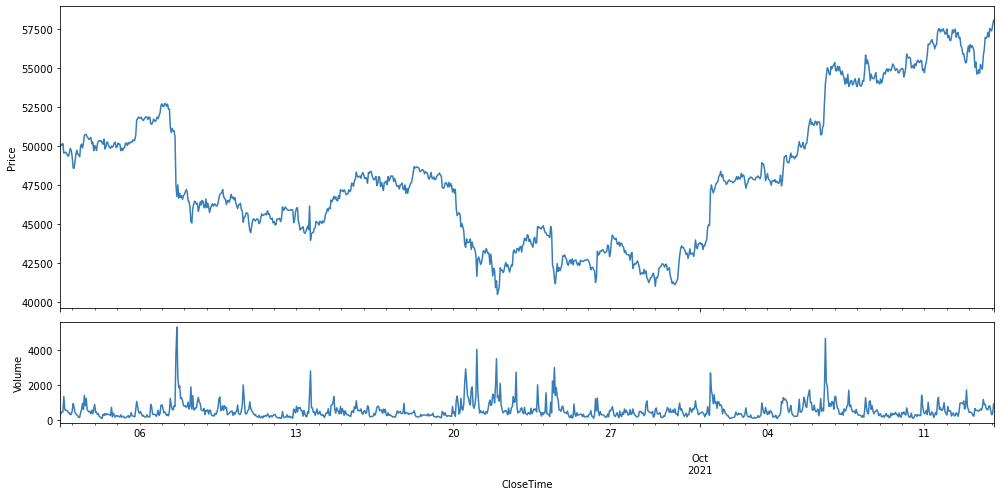

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 7), gridspec_kw = {'height_ratios':[3, 1]})
df1['ClosePrice'].plot(ax=ax1, color='#377eb8')
ax1.set_xlabel('Close Time')
ax1.set_ylabel('Price')

df1['Volume'].plot(ax=ax2, color='#377eb8')
ax2.set_ylabel('Volume')

fig.tight_layout()

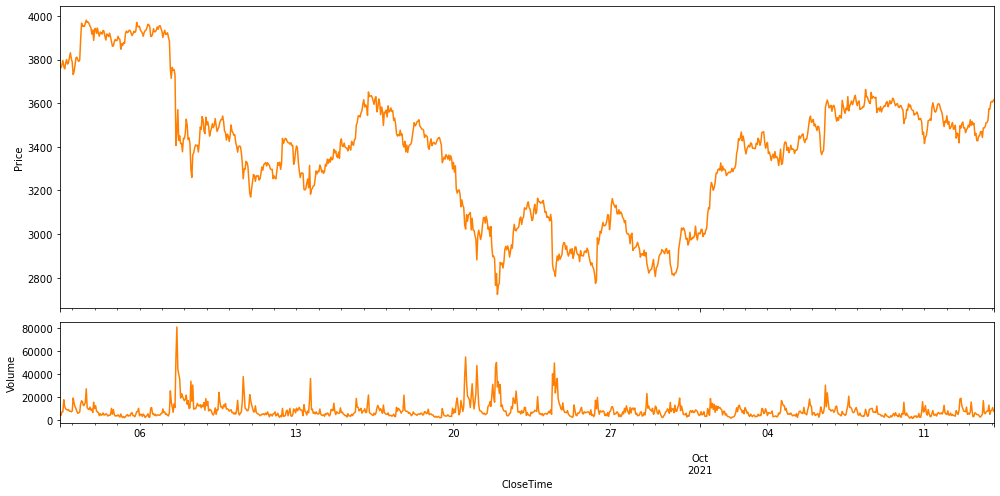

In [14]:
req2 = requests.get('https://api.cryptowat.ch/markets/coinbase-pro/ethusd/ohlc', params={'periods': '3600'})
data2 = req2.json()

df2 = pd.DataFrame(data2['result']['3600'], columns=[
    'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'QuoteVolume'
])

df2.drop(columns=['QuoteVolume'], inplace=True)
df2['CloseTime'] = pd.to_datetime(df2['CloseTime'], unit='s')
df2.set_index('CloseTime', inplace=True)
df2.head()
df2.to_csv('dat2.csv', index=False)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 7), gridspec_kw = {'height_ratios':[3, 1]})
df2['ClosePrice'].plot(ax=ax1, color='#ff7f00')
ax1.set_xlabel('Close Time')
ax1.set_ylabel('Price')

df2['Volume'].plot(ax=ax2, color='#ff7f00')
ax2.set_ylabel('Volume')

fig.tight_layout()

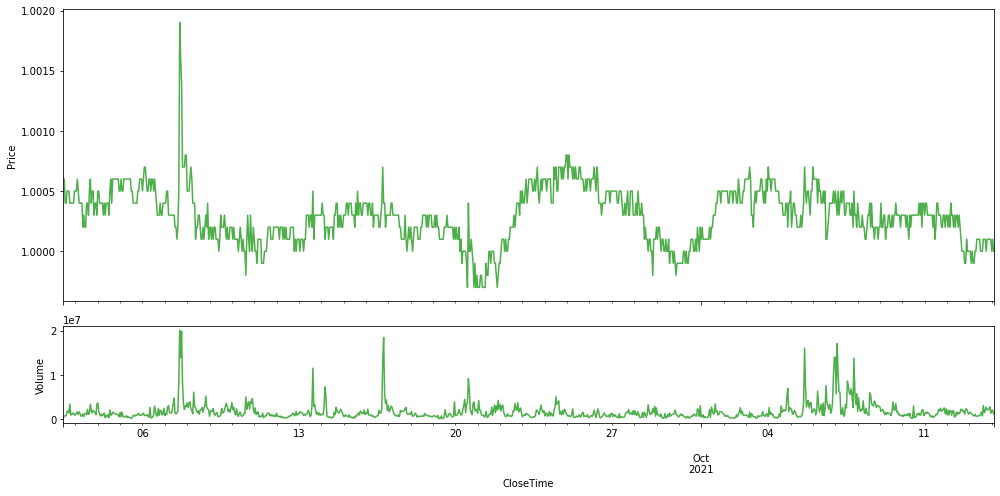

In [15]:
req3 = requests.get('https://api.cryptowat.ch/markets/coinbase-pro/usdtusd/ohlc', params={'periods': '3600'})
data3 = req3.json()

df3 = pd.DataFrame(data3['result']['3600'], columns=[
    'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'QuoteVolume'
])

df3.drop(columns=['QuoteVolume'], inplace=True)
df3['CloseTime'] = pd.to_datetime(df3['CloseTime'], unit='s')
df3.set_index('CloseTime', inplace=True)
df3.head()
df3.to_csv('data3.csv', index=False)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 7), gridspec_kw = {'height_ratios':[3, 1]})
df3['ClosePrice'].plot(ax=ax1, color='#4daf4a')
ax1.set_xlabel('Close Time')
ax1.set_ylabel('Price')

df3['Volume'].plot(ax=ax2, color='#4daf4a')
ax2.set_ylabel('Volume')

fig.tight_layout()

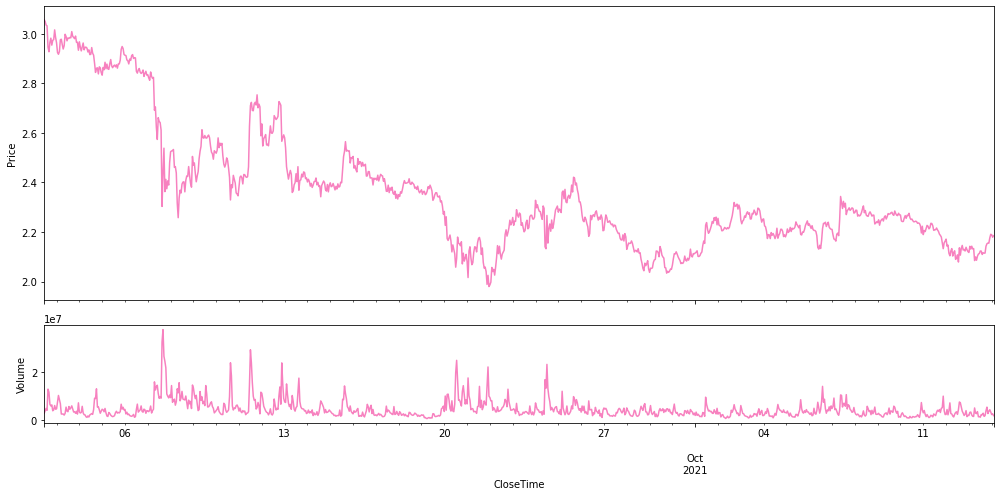

In [16]:
req4 = requests.get('https://api.cryptowat.ch/markets/coinbase-pro/adausd/ohlc', params={'periods': '3600'})
data4 = req4.json()

df4 = pd.DataFrame(data4['result']['3600'], columns=[
    'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'QuoteVolume'
])

df4.drop(columns=['QuoteVolume'], inplace=True)
df4['CloseTime'] = pd.to_datetime(df4['CloseTime'], unit='s')
df4.set_index('CloseTime', inplace=True)
df4.head()
df4.to_csv('data4.csv', index=False)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 7), gridspec_kw = {'height_ratios':[3, 1]})
df4['ClosePrice'].plot(ax=ax1, color='#f781bf')
ax1.set_xlabel('Close Time')
ax1.set_ylabel('Price')

df4['Volume'].plot(ax=ax2, color='#f781bf')
ax2.set_ylabel('Volume')

fig.tight_layout()

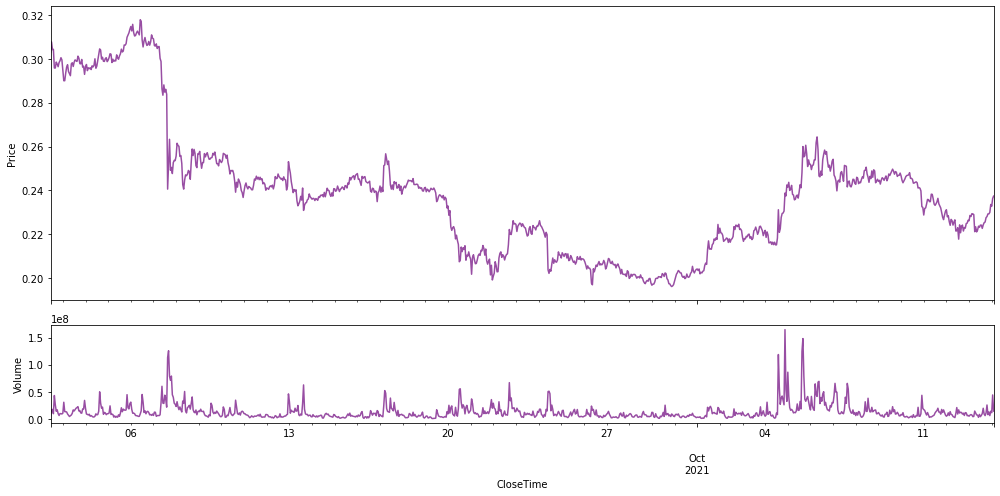

In [17]:
req5 = requests.get('https://api.cryptowat.ch/markets/coinbase-pro/dogeusd/ohlc', params={'periods': '3600'})
data5 = req5.json()

df5 = pd.DataFrame(data5['result']['3600'], columns=[
    'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'QuoteVolume'
])

df5.drop(columns=['QuoteVolume'], inplace=True)
df5['CloseTime'] = pd.to_datetime(df5['CloseTime'], unit='s')
df5.set_index('CloseTime', inplace=True)
df5.head()
df5.to_csv('data5.csv', index=False)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 7), gridspec_kw = {'height_ratios':[3, 1]})
df5['ClosePrice'].plot(ax=ax1, color='#984ea3')
ax1.set_xlabel('Close Time')
ax1.set_ylabel('Price')

df5['Volume'].plot(ax=ax2, color='#984ea3')
ax2.set_ylabel('Volume')

fig.tight_layout()

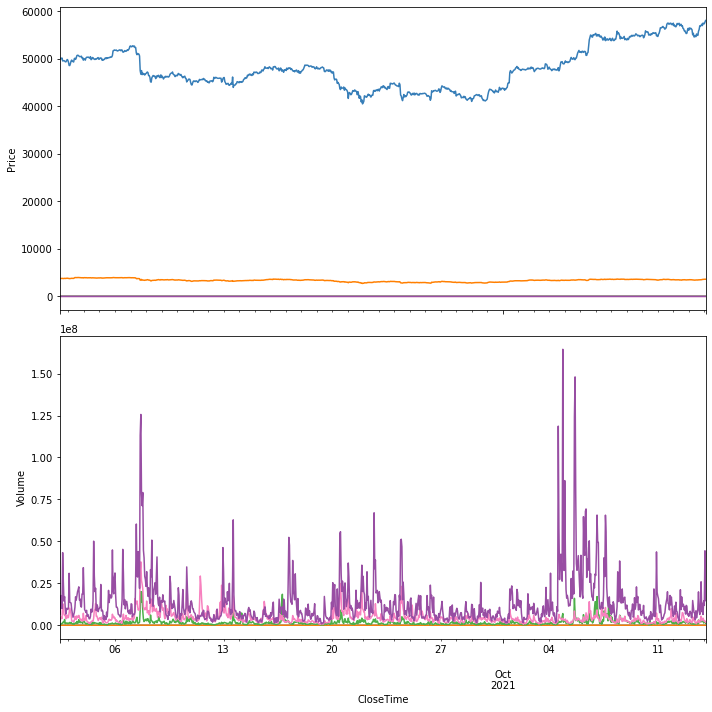

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 10), gridspec_kw = {'height_ratios':[1, 1]})
df1['ClosePrice'].plot(ax=ax1, color='#377eb8')
df2['ClosePrice'].plot(ax=ax1, color='#ff7f00')
df3['ClosePrice'].plot(ax=ax1, color='#4daf4a')
df4['ClosePrice'].plot(ax=ax1, color='#f781bf')
df5['ClosePrice'].plot(ax=ax1, color='#984ea3')
ax1.set_xlabel('Close Time')
ax1.set_ylabel('Price')

df1['Volume'].plot(ax=ax2, color='#377eb8')
df2['Volume'].plot(ax=ax2, color='#ff7f00')
df3['Volume'].plot(ax=ax2, color='#4daf4a')
df4['Volume'].plot(ax=ax2, color='#f781bf')
df5['Volume'].plot(ax=ax2, color='#984ea3')
ax2.set_ylabel('Volume')


fig.tight_layout()

In [19]:
# make a copy of each data frame
df1_copy = df1.copy()
df2_copy = df2.copy()
df3_copy = df3.copy()
df4_copy = df4.copy()
df5_copy = df5.copy()

In [20]:
# Adding 'Name' columns on copy of data frame
lists = ["btcusd", "ethusd", "usdtusd", "adausd", "dogeusd"]

df1_copy['Name'] = lists[0]
df2_copy['Name'] = lists[1]
df3_copy['Name'] = lists[2]
df4_copy['Name'] = lists[3]
df5_copy['Name'] = lists[4]

In [45]:
# append all of data into one 
df = df1_copy.copy()
df = df.append([df2_copy, df3_copy, df4_copy, df5_copy])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2021-09-02 11:00:00 to 2021-10-14 02:00:00
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OpenPrice   5000 non-null   float64
 1   HighPrice   5000 non-null   float64
 2   LowPrice    5000 non-null   float64
 3   ClosePrice  5000 non-null   float64
 4   Volume      5000 non-null   float64
 5   Name        5000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 273.4+ KB


In [46]:
# place the name column at the front   
df = pd.DataFrame(df, columns=[
    'Name', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume' 
])

In [47]:
# convert close price and volume into log format
df_copy = df.copy()
df_copy.insert(5, 'Log_ClosePrice', np.log(df_copy['ClosePrice']))
df_copy.insert(7, 'Log_Volume', np.log(df_copy['Volume']))
df_copy.head()

,Name,OpenPrice,HighPrice,LowPrice,ClosePrice,Log_ClosePrice,Volume,Log_Volume
CloseTime,,,,,,,,
2021-09-02 11:00:00,btcusd,49842.10,50104.81,49757.65,50062.61,10.821030,357.449195,5.878993
2021-09-02 12:00:00,btcusd,50061.33,50170.00,49831.82,50101.05,10.821797,392.517153,5.972580
2021-09-02 13:00:00,btcusd,50099.05,50249.52,49881.67,50030.79,10.820394,488.080143,6.190480
2021-09-02 14:00:00,btcusd,50030.79,50210.02,49976.52,50150.97,10.822793,472.812528,6.158699
2021-09-02 15:00:00,btcusd,50157.45,50392.19,49391.20,49546.67,10.810670,1351.033835,7.208625


In [48]:
df_copy.shape

(5000, 8)

In [49]:
df_copy.to_csv('data.csv', index=False)

In [50]:
df_copy[df_copy['Name'] == 'dogeusd']

,Name,OpenPrice,HighPrice,LowPrice,ClosePrice,Log_ClosePrice,Volume,Log_Volume
CloseTime,,,,,,,,
2021-09-02 11:00:00,dogeusd,0.3012,0.3041,0.3001,0.3030,-1.194022,6632138.9,15.707438
2021-09-02 12:00:00,dogeusd,0.3031,0.3086,0.3015,0.3077,-1.178630,17399695.3,16.671963
2021-09-02 13:00:00,dogeusd,0.3075,0.3096,0.3031,0.3042,-1.190070,17666389.7,16.687175
2021-09-02 14:00:00,dogeusd,0.3041,0.3060,0.3031,0.3043,-1.189741,9923372.5,16.110403
2021-09-02 15:00:00,dogeusd,0.3042,0.3043,0.2938,0.2958,-1.218072,43284445.9,17.583304
...,...,...,...,...,...,...,...,...
2021-10-13 22:00:00,dogeusd,0.2293,0.2314,0.2289,0.2300,-1.469676,6404944.6,15.672581
2021-10-13 23:00:00,dogeusd,0.2301,0.2342,0.2300,0.2336,-1.454145,14448764.6,16.486119
2021-10-14 00:00:00,dogeusd,0.2337,0.2339,0.2311,0.2328,-1.457576,11797640.2,16.283410


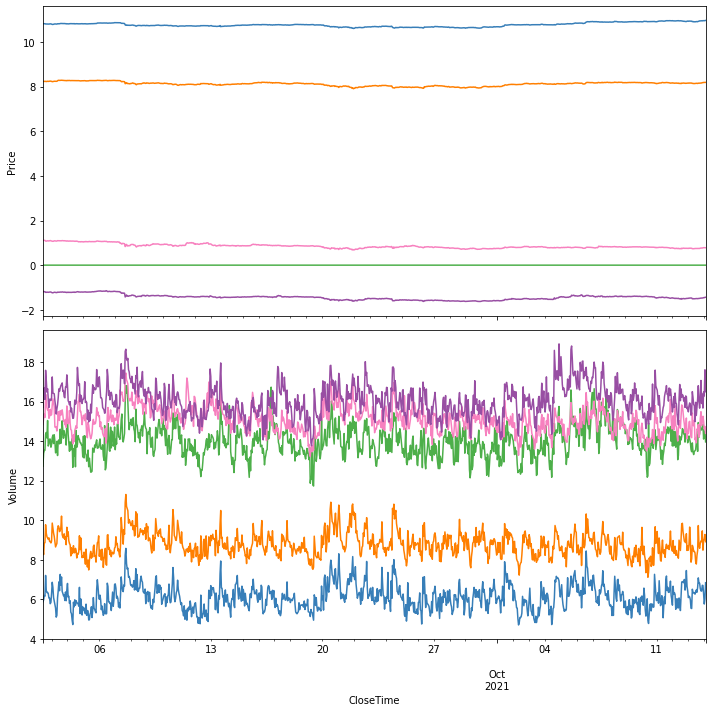

In [51]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 10), gridspec_kw = {'height_ratios':[1, 1]})
df_copy[df_copy['Name'] == 'btcusd']['Log_ClosePrice'].plot(ax=ax1, color='#377eb8')
df_copy[df_copy['Name'] == 'ethusd']['Log_ClosePrice'].plot(ax=ax1, color='#ff7f00')
df_copy[df_copy['Name'] == 'usdtusd']['Log_ClosePrice'].plot(ax=ax1, color='#4daf4a')
df_copy[df_copy['Name'] == 'adausd']['Log_ClosePrice'].plot(ax=ax1, color='#f781bf')
df_copy[df_copy['Name'] == 'dogeusd']['Log_ClosePrice'].plot(ax=ax1, color='#984ea3')
ax1.set_xlabel('Close Time')
ax1.set_ylabel('Price')

df_copy[df_copy['Name'] == 'btcusd']['Log_Volume'].plot(ax=ax2, color='#377eb8')
df_copy[df_copy['Name'] == 'ethusd']['Log_Volume'].plot(ax=ax2, color='#ff7f00')
df_copy[df_copy['Name'] == 'usdtusd']['Log_Volume'].plot(ax=ax2, color='#4daf4a')
df_copy[df_copy['Name'] == 'adausd']['Log_Volume'].plot(ax=ax2, color='#f781bf')
df_copy[df_copy['Name'] == 'dogeusd']['Log_Volume'].plot(ax=ax2, color='#984ea3')
ax2.set_ylabel('Volume')

fig.tight_layout()

In [65]:
lm = sm.OLS(dfR1['ClosePrice'], dfR1[['OpenPrice', 'HighPrice', 'LowPrice','Volume', 'intercept']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ClosePrice   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 8.960e+04
Date:                Wed, 29 Sep 2021   Prob (F-statistic):               0.00
Time:                        16:10:33   Log-Likelihood:                -6361.2
No. Observations:                1000   AIC:                         1.273e+04
Df Residuals:                     995   BIC:                         1.276e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
OpenPrice     -0.6249      0.025    -24.951      0.000      -0.674      -0.576
HighPrice      0.7089      0.029     24.755      0.000       0.653       0.765
LowPrice       0.9157      0.029     31.572      0.000       0.859       0.973
Volume         0.2296      0.024      9.401      0.000       0.182       0.278
intercept     21.8819     82.478      0.265      0.791    -139.969     183.732
==============================================================================
Omnibus:                      183.833   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3872.846
Skew:                           0.092   Prob(JB):                         0.00
Kurtosis:                      12.639   Cond. No.                     1.51e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""